In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary modules to run code
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats

In [3]:
#importing secchi data files
file_path = '/home/jovyan/EmmaIacono/194903-202105_Cast_nccsv.csv'
secchi= pd.read_csv(file_path, skiprows = 218, low_memory= False)
#file contains metadata row 1-219
#so we are skipping indices 0-218

# Create a new dataframe called df so that we can add a new 'Distance_with_*' column
# Filter data by year
df = secchi[secchi['Year']>2006]
df['Distance_with_*'] = df['Distance'] * -1.852

# Create a new dataframe that contains all the columns where distance_with_* is less than equal to 150
df_inshore = df[(df['Distance_with_*']<=150)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 450
df_offshore = df[(df['Distance_with_*']>450)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 150 and less than/ equal to 450
cond1 = df['Distance_with_*']<=450
cond2 = df['Distance_with_*']>150
df_transition = df[cond1 & cond2]



### In shore ###

# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate mean of secchi data by year
df_inshore_secchi_mean = df_inshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df.Year.unique()
y_inshore = df_inshore_year.Secchi.mean()
y_inshore_std_error = df_inshore_year.Secchi.std()/np.sqrt(inshore_N)



### Transition shore ###

# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate mean of secchi data by year
df_transition_secchi_mean = df_transition_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df.Year.unique()
y_transition = df_transition_year.Secchi.mean()   
y_transition_std_error = df_transition_year.Secchi.std()/np.sqrt(transition_N)



### Off shore ###

# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')
                                                                                                                                                                                                                            
# Calculate mean of secchi data by year
df_offshore_secchi_mean = df_offshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.Secchi.mean()
y_offshore_std_error = df_offshore_year.Secchi.std()/(np.sqrt(offshore_N))


/tmp/ipykernel_866/3154444516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_with_*'] = df['Distance'] * -1.852


In [4]:
# ### Plotting ###

# inshore = sns.regplot(x=x_inshore, 
#                       y=y_inshore, 
#                       scatter_kws={"color": "darkslateblue"}, 
#                       line_kws={"color": "aquamarine"},
#                       marker = '*')

# transition = sns.regplot(x=x_transition, 
#                       y=y_transition, 
#                       scatter_kws={"color": "orange"}, 
#                       line_kws={"color": "aquamarine"},
#                          marker = '>')

# offshore = sns.regplot(x=x_offshore, 
#                       y=y_offshore, 
#                       scatter_kws={"color": "green"}, 
#                       line_kws={"color": "aquamarine"},
#                        marker = '.')



# chart = sns.regplot(x=x, y=y, 
#                     scatter_kws={"color": "darkslateblue"}, 
#                     line_kws={"color": "aquamarine"})

# reg_line_xarray = chart.get_lines()[0].get_xdata()
# reg_line_yarray= chart.get_lines()[0].get_ydata()
# print('Slope: ', (reg_line_yarray[1]-reg_line_yarray[0])/(reg_line_xarray[1]-reg_line_xarray[0]))
# print('Intercept: ', reg_line_yarray[0]+ 0.081*reg_line_xarray[0])
# # chart.text(1969,57,'y = -0.0807x + 181.3705', style='italic', fontdict={'size': 10, 'family': 'Sans-serif'})

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'bold'})

# chart.set_xlabel('Year', fontdict={'size': 12})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12})

plt.show()
# fig = chart.get_figure()
# fig.savefig('./figures/secchi_disk_mean1.png')

# chart.set_title('Secchi Disk Depth: 1969-2021', fontdict={'size': 15, 'weight': 'heavy', 'family':'Sans-serif'})
# chart.set_xlabel('Year', fontdict={'size': 12, 'family':'sans-serif'})
# chart.set_ylabel('Secchi Depth (meters)', fontdict={'size': 12, 'family':'sans-serif'})
# plt.show()

In [5]:
### Upgrade Seaborn library, dependancies = NumPY, Pandas, Matplotlib
# !python -m pip uninstall seaborn --yes
#pip install git+https://github.com/mwaskom/seaborn.git

In [6]:
# pip install seaborn

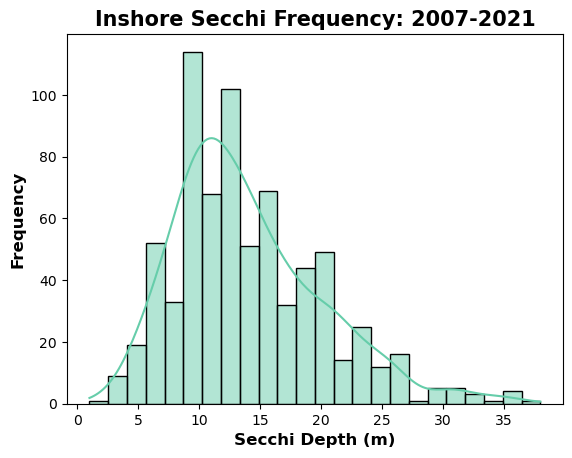

In [7]:
### Inshore Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_inshore[df_inshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Inshore Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = filtered_data['Secchi']
# plot_y = filtered_data['Year']


ax = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='mediumaquamarine')

ax.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
ax.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Inshore_Histogram.png')

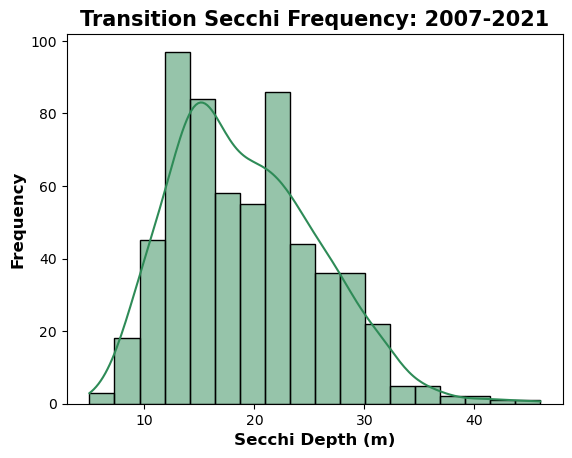

In [8]:
### Transition Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_transition[df_transition['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Transition Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = filtered_data['Secchi']
plot_y = filtered_data['Year']


chart = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='seagreen')


chart.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
chart.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
chart.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = chart.get_figure()
fig.savefig('./figures/Histogram_Transition.png') 

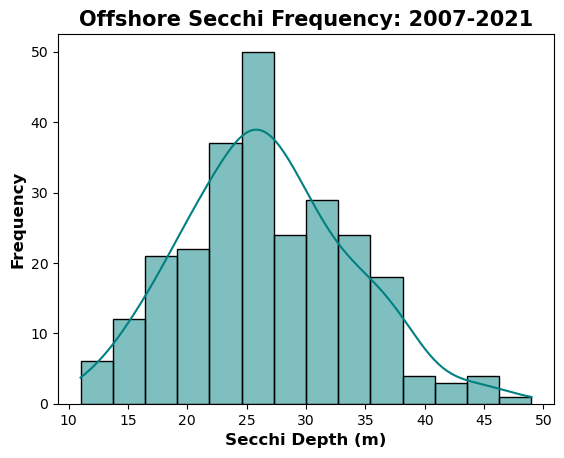

In [9]:
### Offshore Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_offshore[df_offshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Offshore Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = filtered_data['Secchi']
plot_y = filtered_data['Year']


chart = sns.histplot(x= plot_x,
                    element='bars',
                    kde=True,
                    color='teal')


chart.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
chart.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
chart.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = chart.get_figure()
fig.savefig('./figures/Histogram_Offshore.png')

/tmp/ipykernel_866/2419608005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inshore['ReciprocalSecchi'] = 1/df_inshore.Secchi


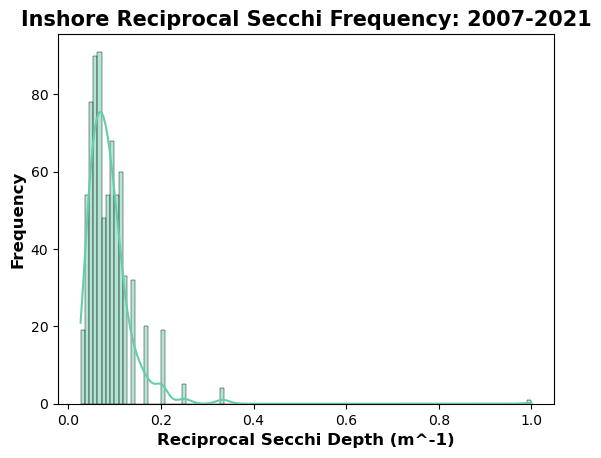

In [10]:
### Reciprocal Inshore Histogram plot

df_inshore['ReciprocalSecchi'] = 1/df_inshore.Secchi

df_inshore.ReciprocalSecchi

# Filtered data from years 2007-2021

filtered_data = df_inshore[df_inshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Inshore Reciprocal Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = df_inshore.ReciprocalSecchi


ax = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='mediumaquamarine')

ax.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
ax.set_xlabel('Reciprocal Secchi Depth (m^-1)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
                    
plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Reciprocal_Inshore_Histogram.png')

/tmp/ipykernel_866/1626853834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi


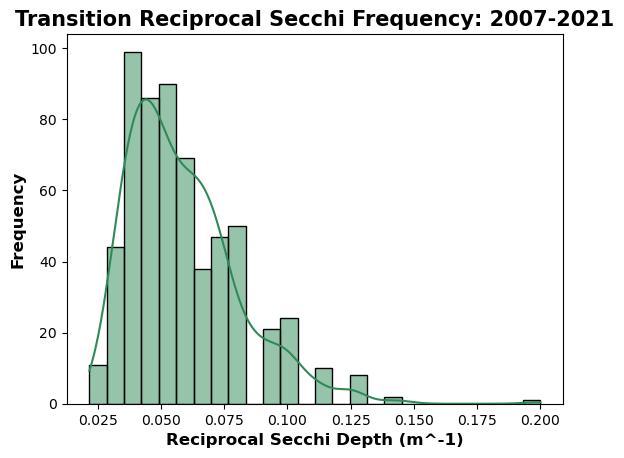

In [11]:
### Reciprocal Transition Histogram plot 

df_transition['ReciprocalSecchi'] = 1/df_transition.Secchi

df_transition.ReciprocalSecchi

# Filtered data from years 2007-2021

filtered_data = df_transition[df_transition['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

# here, we are changing the x axis to year instead of distance from shore
plot_x =df_transition.ReciprocalSecchi

plot_title = 'Transition Reciprocal Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)


chart = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='seagreen')


chart.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
chart.set_xlabel('Reciprocal Secchi Depth (m^-1)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
chart.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = chart.get_figure()
fig.savefig('./figures/Reciprocal_Transition_Histogram.png')

/tmp/ipykernel_866/752911873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offshore['ReciprocalSecchi'] = 1/df_offshore.Secchi


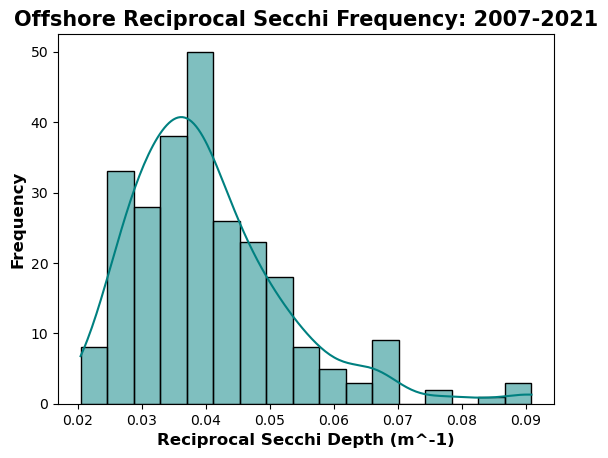

In [12]:
### Reciprocal Offshore Histogram plot 

df_offshore['ReciprocalSecchi'] = 1/df_offshore.Secchi

df_offshore.ReciprocalSecchi

# Filtered data from years 2007-2021

filtered_data = df_offshore[df_offshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

# here, we are changing the x axis to year instead of distance from shore
plot_x = df_offshore.ReciprocalSecchi

plot_title = 'Offshore Reciprocal Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)


chart = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='teal')


chart.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
chart.set_xlabel('Reciprocal Secchi Depth (m^-1)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
chart.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = chart.get_figure()
fig.savefig('./figures/Reciprocal_Offshore_Histogram.png')

In [13]:
#importing secchi data files
file_path = '/home/jovyan/EmmaIacono/194903-202105_Cast_nccsv.csv'
secchi= pd.read_csv(file_path, skiprows = 218, low_memory= False)
#file contains metadata row 1-219
#so we are skipping indices 0-218

# Create a new dataframe called df so that we can add a new 'Distance_with_*' column
# Filter data by year
df = secchi[secchi['Year']>2006]
df['Distance_with_*'] = df['Distance'] * -1.852

# Create a new dataframe that contains all the columns where distance_with_* is less than equal to 150
df_inshore = df[(df['Distance_with_*']<=150)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 450
df_offshore = df[(df['Distance_with_*']>450)]

# Create a new dataframe that contains all the columns where distance_with_* is greater than 150 and less than/ equal to 450
cond1 = df['Distance_with_*']<=450
cond2 = df['Distance_with_*']>150
df_transition = df[cond1 & cond2]



### In shore ###

# Group filtered data by year
df_inshore_year = df_inshore.groupby('Year')

# Calculate mean of secchi data by year
df_inshore_secchi_mean = df_inshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
inshore_N = df_inshore_year.Secchi.count().values

# Plot x versus y
x_inshore = df.Year.unique()
y_inshore = df_inshore_year.Secchi.mean()
y_inshore_std_error = df_inshore_year.Secchi.std()/np.sqrt(inshore_N)



### Transition shore ###

# Group filtered data by year
df_transition_year = df_transition.groupby('Year')

# Calculate mean of secchi data by year
df_transition_secchi_mean = df_transition_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
transition_N = df_transition_year.Secchi.count().values

# Plot x versus y
x_transition = df.Year.unique()
y_transition = df_transition_year.Secchi.mean()   
y_transition_std_error = df_transition_year.Secchi.std()/np.sqrt(transition_N)



### Off shore ###

# Group filtered data by year
df_offshore_year = df_offshore.groupby('Year')
                                                                                                                                                                                                                            
# Calculate mean of secchi data by year
df_offshore_secchi_mean = df_offshore_year.Secchi.mean()     

# Store unique year values
df_year_values = df.Year.unique()

# Find the sample size
offshore_N = df_offshore_year.Secchi.count().values

# Plot x versus y
x_offshore = df_year_values
y_offshore = df_offshore_year.Secchi.mean()
y_offshore_std_error = df_offshore_year.Secchi.std()/(np.sqrt(offshore_N))


/tmp/ipykernel_866/3154444516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance_with_*'] = df['Distance'] * -1.852


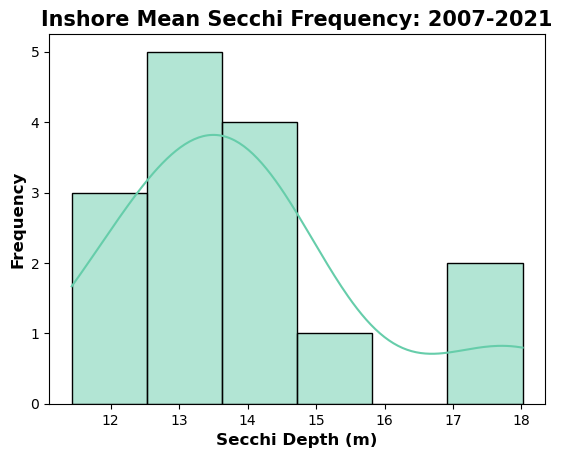

In [20]:
### Mean Inshore Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_inshore[df_inshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Inshore Mean Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = df_inshore_secchi_mean
# plot_y = filtered_data['Year']


ax = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='mediumaquamarine')

ax.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
ax.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Mean_Inshore_Histogram.png')

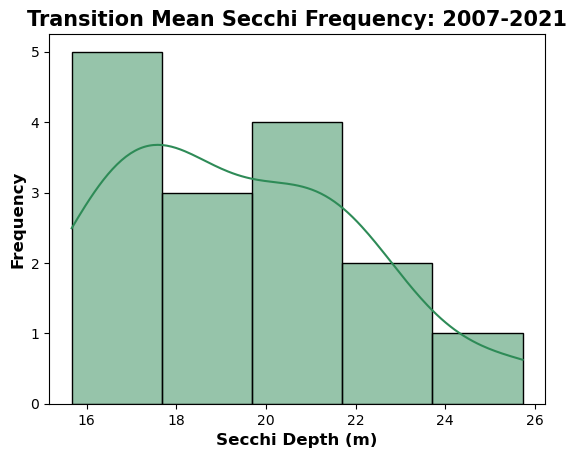

In [21]:
### Mean Transition Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_transition[df_transition['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Transition Mean Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = df_transition_secchi_mean


ax = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='seagreen')

ax.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
ax.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Mean_Transition_Histogram.png')

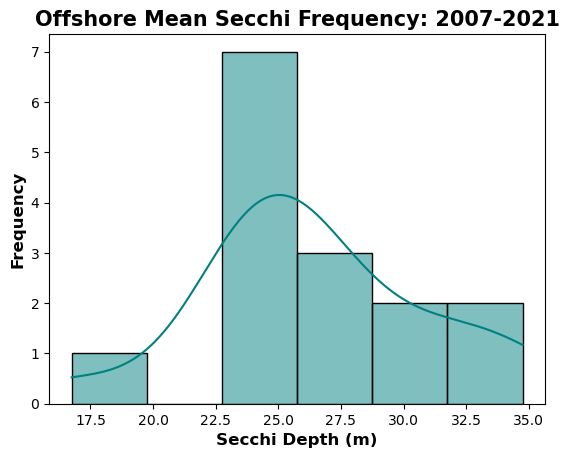

In [23]:
### Mean Offshore Histogram plot

# Filtered data from years 2007-2021

filtered_data = df_offshore[df_offshore['Year']>2006]

filtered_data_start_year = int(filtered_data['Year'].iloc[0])
filtered_data_end_year = int(filtered_data['Year'].iloc[-1])

plot_title = 'Offshore Mean Secchi Frequency: ' + str(filtered_data_start_year) + '-' + str(filtered_data_end_year)

# here, we are changing the x axis to year instead of distance from shore
plot_x = df_offshore_secchi_mean


ax = sns.histplot(x= plot_x,
                    element='bars',
                    legend=True,
                    kde=True,
                    color='teal')

ax.set_title(plot_title, fontdict={'size': 15, 'weight': 'bold'})
ax.set_xlabel('Secchi Depth (m)', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})
ax.set_ylabel('Frequency', fontdict={'size': 12, 'family': 'Sans-serif', 'weight': 'heavy'})

plt.show()

fig = ax.get_figure()
fig.savefig('./figures/Mean_Offshore_Histogram.png')